In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/Mobiles Dataset (2025).csv', encoding='latin1')

# Show the first 5 rows
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


**To Remove Currency Symbols from Price Columns**

We’ll clean all these columns:

Launched Price (Pakistan)

Launched Price (India)

Launched Price (China)

Launched Price (USA)

Launched Price (Dubai)


In [ ]:
# List of price columns to clean
price_columns = [
    'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)',
    'Launched Price (USA)', 'Launched Price (Dubai)'
]

# Remove currency symbols and commas, and convert to numeric (safely)
for col in price_columns:
    df[col] = df[col].replace('[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Show cleaned prices
df[price_columns].head()

,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai)
0,224999.0,79999,5799,799.0,2799
1,234999.0,84999,6099,849.0,2999
2,244999.0,89999,6499,899.0,3199
3,249999.0,89999,6199,899.0,3199
4,259999.0,94999,6499,949.0,3399


**Extract Only the Year from "Launched Year"**

We already have a column called "Launched Year" — let’s make sure it’s numeric (just in case it includes text or formatting).

In [ ]:
# Convert Launched Year to numeric (if not already)
df['Launched Year'] = pd.to_numeric(df['Launched Year'], errors='coerce')

# Show unique values to confirm
df['Launched Year'].unique()


array([2024, 2023, 2022, 2021, 2020, 2019, 2017, 2018, 2016, 2014, 2025])

Find Average, Minimum, and Maximum Prices for Each Country

Average, Min, and Max prices grouped by each country’s price column.

In [ ]:
# Average, Min, and Max for each country's price
for col in price_columns:
    print(f"\n📊 Stats for {col}:")
    print("Average Price:", df[col].mean())
    print("Minimum Price:", df[col].min())
    print("Maximum Price:", df[col].max())



📊 Stats for Launched Price (Pakistan):
Average Price: 125436.06350914962
Minimum Price: 15999.0
Maximum Price: 604999.0

📊 Stats for Launched Price (India):
Average Price: 50576.818279569896
Minimum Price: 5999
Maximum Price: 274999

📊 Stats for Launched Price (China):
Average Price: 3821.430107526882
Minimum Price: 499
Maximum Price: 17999

📊 Stats for Launched Price (USA):
Average Price: 625.5157634408603
Minimum Price: 79.0
Maximum Price: 39622.0

📊 Stats for Launched Price (Dubai):
Average Price: 2183.9333333333334
Minimum Price: 299
Maximum Price: 11099


 Calculate Total Number of Models per Company

 We’ll now count how many mobile models each company has in the dataset.



In [ ]:
# Count of models per company
model_counts = df['Company Name'].value_counts()
print(model_counts)


Company Name
Oppo        129
Apple        97
Honor        91
Samsung      88
Vivo         86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64


Company with Highest Average Battery Capacity

Right now, Battery Capacity column probably looks like this:
"4,200mAh" or "6000mAh" → we need to:

1.Remove "mAh" and commas

2.Convert it to a number

3.Find the average per company

In [ ]:
# Clean and convert Battery Capacity column
df['Battery Capacity'] = df['Battery Capacity'].replace('[^0-9]', '', regex=True).astype(float)

# Group by Company and calculate average battery
battery_avg = df.groupby('Company Name')['Battery Capacity'].mean().sort_values(ascending=False)
battery_avg


,Battery Capacity
Company Name,
Poco,10000.000000
iQOO,8040.000000
Realme,5691.304348
Honor,5488.461538
Infinix,5330.357143
Tecno,5315.384615
Nokia,5309.090909
Xiaomi,5172.222222
Samsung,5119.431818


 Bar Chart – Average Price by Company (Let’s use India prices 🇮🇳 for this example)

 We’ll group by company and calculate average price, then plot a bar chart


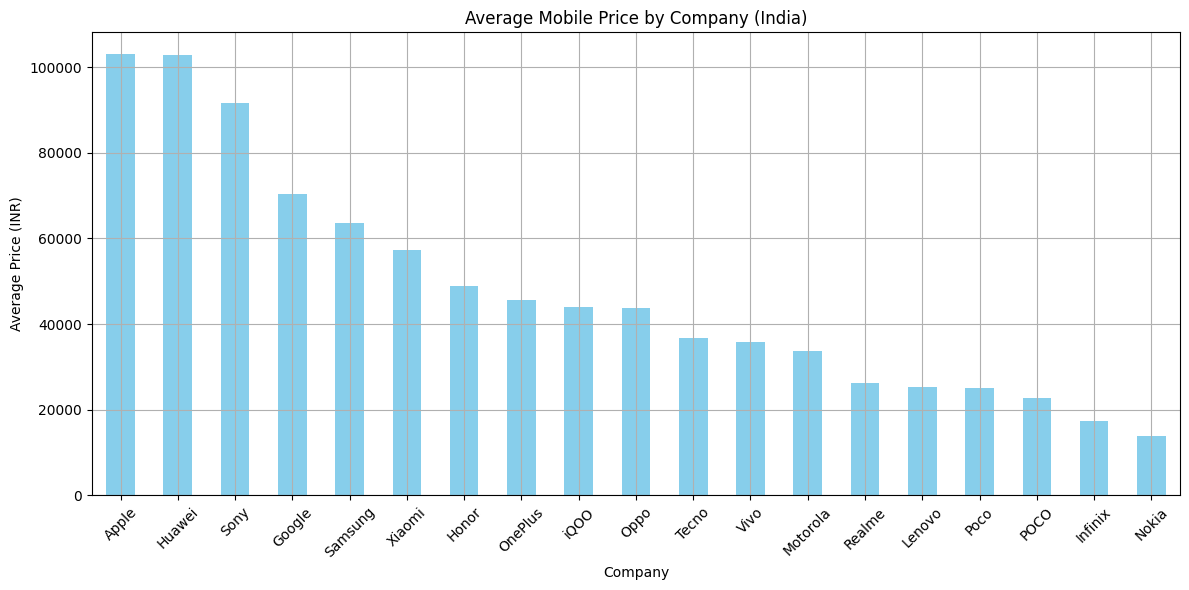

In [ ]:
import matplotlib.pyplot as plt

# Calculate average price per company (India price)
avg_price_india = df.groupby('Company Name')['Launched Price (India)'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
avg_price_india.plot(kind='bar', color='skyblue')

plt.title('Average Mobile Price by Company (India)')
plt.ylabel('Average Price (INR)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Create a line chart showing the battery capacity variation by model**

1: Convert Battery Capacity column to numeric

In [ ]:
df["Battery Capacity (mAh)"] = df["Battery Capacity"].astype(str).str.replace("mAh", "", regex=False)
df["Battery Capacity (mAh)"] = df["Battery Capacity (mAh)"].str.replace(",", "", regex=False)
df["Battery Capacity (mAh)"] = pd.to_numeric(df["Battery Capacity (mAh)"], errors='coerce')
df[["Model Name", "Battery Capacity", "Battery Capacity (mAh)"]].head(10)


,Model Name,Battery Capacity,Battery Capacity (mAh)
0,iPhone 16 128GB,3600.0,3600.0
1,iPhone 16 256GB,3600.0,3600.0
2,iPhone 16 512GB,3600.0,3600.0
3,iPhone 16 Plus 128GB,4200.0,4200.0
4,iPhone 16 Plus 256GB,4200.0,4200.0
5,iPhone 16 Plus 512GB,4200.0,4200.0
6,iPhone 16 Pro 128GB,4400.0,4400.0
7,iPhone 16 Pro 256GB,4400.0,4400.0
8,iPhone 16 Pro 512GB,4400.0,4400.0
9,iPhone 16 Pro Max 128GB,4500.0,4500.0


 Line Chart – Battery Capacity Variation by Model

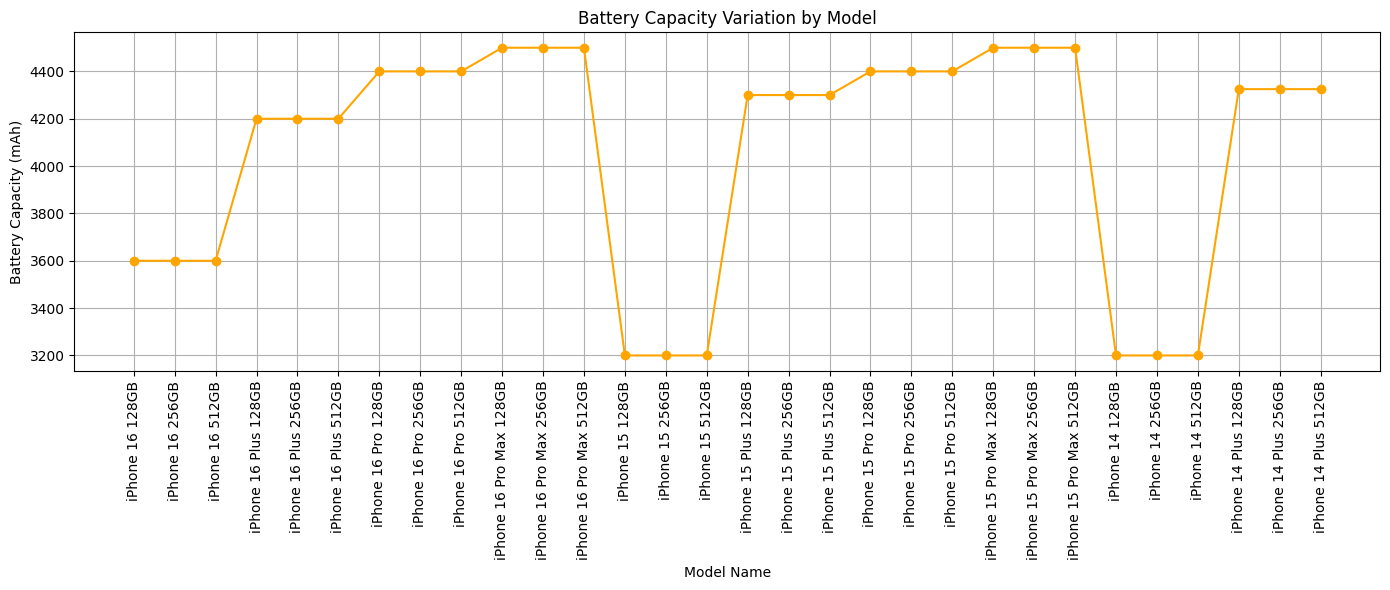

In [ ]:
import matplotlib.pyplot as plt

# Limit to top 30 models for better readability (optional)
top_models = df[["Model Name", "Battery Capacity (mAh)"]].dropna().head(30)

plt.figure(figsize=(14, 6))
plt.plot(top_models["Model Name"], top_models["Battery Capacity (mAh)"], marker='o', linestyle='-', color='orange')
plt.xticks(rotation=90)
plt.title("Battery Capacity Variation by Model")
plt.xlabel("Model Name")
plt.ylabel("Battery Capacity (mAh)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Pivot Table – Count of Models per Company for Each Year**

1. Create the Pivot Table

Rows = Company Name

Columns = Launched Year

Values = Count of models

In [ ]:
pivot_table = pd.pivot_table(
    df,
    index="Company Name",
    columns="Launched Year",
    values="Model Name",
    aggfunc="count",
    fill_value=0
)

pivot_table

Launched Year,2014,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Company Name,,,,,,,,,,,
Apple,0,0,2,9,11,27,12,12,12,12,0
Google,0,0,0,0,4,3,3,3,3,5,0
Honor,0,0,0,0,0,12,20,17,24,18,0
Huawei,0,0,0,0,0,0,7,7,10,18,0
Infinix,0,0,0,0,0,9,7,9,11,20,0
Lenovo,0,0,0,1,6,0,3,5,0,0,0
Motorola,0,0,0,0,0,0,0,18,8,36,0
Nokia,0,0,0,0,0,0,2,4,5,0,0
OnePlus,0,0,2,2,2,13,8,7,14,5,0


**Find the highest and lowest-priced model for each company**
 1.  highest Priced Model per Company

In [ ]:
df["Price (INR)"] = df["Launched Price (India)"].astype(str).str.replace("INR", "", regex=False)
df["Price (INR)"] = df["Price (INR)"].str.replace(",", "", regex=False)
df["Price (INR)"] = pd.to_numeric(df["Price (INR)"], errors='coerce')
df[["Company Name", "Model Name", "Launched Price (India)", "Price (INR)"]].head(10)

,Company Name,Model Name,Launched Price (India),Price (INR)
0,Apple,iPhone 16 128GB,79999,79999
1,Apple,iPhone 16 256GB,84999,84999
2,Apple,iPhone 16 512GB,89999,89999
3,Apple,iPhone 16 Plus 128GB,89999,89999
4,Apple,iPhone 16 Plus 256GB,94999,94999
5,Apple,iPhone 16 Plus 512GB,104999,104999
6,Apple,iPhone 16 Pro 128GB,99999,99999
7,Apple,iPhone 16 Pro 256GB,104999,104999
8,Apple,iPhone 16 Pro 512GB,114999,114999
9,Apple,iPhone 16 Pro Max 128GB,109999,109999


 2.Lowest Priced Model per Company

In [ ]:
lowest_price = df.loc[df.groupby("Company Name")["Price (INR)"].idxmin()][
    ["Company Name", "Model Name", "Price (INR)"]
].sort_values(by="Price (INR)")

lowest_price.reset_index(drop=True, inplace=True)
lowest_price


,Company Name,Model Name,Price (INR)
0,Infinix,Smart HD 32GB,5999
1,Tecno,Pop 9 64GB,6999
2,Lenovo,K13 32GB,7499
3,Nokia,C22 64GB,8499
4,Samsung,Galaxy Tab E 8.0 16GB,8499
5,Oppo,A49 5G 128GB,8999
6,Motorola,Moto G Play 32GB,9999
7,Vivo,Y21 64GB,9999
8,POCO,M3 64GB,10999
9,Honor,Pad X8a Kids Edition,10999


Write a SQL query to remove non-numeric characters from price columns.

1.Create SQLite connection and load your DataFrame

In [ ]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Write the DataFrame into the SQLite table
df.to_sql("mobiles", conn, index=False, if_exists="replace")


930

2.  SQL query for removing the non-numeric charaters from price columns

In [ ]:
query = """
SELECT
  "Model Name",
  "Company Name",
  "Launched Price (India)",
  CAST(
    REPLACE(REPLACE(COALESCE("Launched Price (India)", ''), 'INR ', ''), ',', '')
    AS INTEGER
  ) AS Cleaned_INR_Price
FROM mobiles
"""
pd.read_sql_query(query, conn)


,Model Name,Company Name,Launched Price (India),Cleaned_INR_Price
0,iPhone 16 128GB,Apple,79999,79999
1,iPhone 16 256GB,Apple,84999,84999
2,iPhone 16 512GB,Apple,89999,89999
3,iPhone 16 Plus 128GB,Apple,89999,89999
4,iPhone 16 Plus 256GB,Apple,94999,94999
...,...,...,...,...
925,Pad 5G 128GB,Poco,23999,23999
926,Pad 5G 256GB,Poco,25999,25999
927,Galaxy Z Fold6 256GB,Samsung,164999,164999
928,Galaxy Z Fold6 512GB,Samsung,176999,176999


**Convert the battery capacity column to a numeric value.**



In [ ]:
query = """
SELECT
    "Company Name",
    "Model Name",
    "Battery Capacity",
    CAST(REPLACE(REPLACE("Battery Capacity", 'mAh', ''), ',', '') AS INTEGER) AS Battery_Capacity_Numeric
FROM mobiles;
"""

battery_capacity_numeric_df = pd.read_sql_query(query, conn)
battery_capacity_numeric_df.head(10)


,Company Name,Model Name,Battery Capacity,Battery_Capacity_Numeric
0,Apple,iPhone 16 128GB,3600.0,3600
1,Apple,iPhone 16 256GB,3600.0,3600
2,Apple,iPhone 16 512GB,3600.0,3600
3,Apple,iPhone 16 Plus 128GB,4200.0,4200
4,Apple,iPhone 16 Plus 256GB,4200.0,4200
5,Apple,iPhone 16 Plus 512GB,4200.0,4200
6,Apple,iPhone 16 Pro 128GB,4400.0,4400
7,Apple,iPhone 16 Pro 256GB,4400.0,4400
8,Apple,iPhone 16 Pro 512GB,4400.0,4400
9,Apple,iPhone 16 Pro Max 128GB,4500.0,4500


Write a query to get the top 5 most expensive mobile models.

In [ ]:
query = """
SELECT
    "Company Name",
    "Model Name",
    CAST(REPLACE(REPLACE("Launched Price (India)", 'INR', ''), ',', '') AS INTEGER) AS Cleaned_INR_Price
FROM mobiles
ORDER BY Cleaned_INR_Price DESC
LIMIT 5;
"""

top5_expensive = pd.read_sql_query(query, conn)
top5_expensive


,Company Name,Model Name,Cleaned_INR_Price
0,Huawei,Mate XT 512GB,274999
1,Huawei,Mate XT 256GB,259999
2,Huawei,Mate X2,249999
3,Huawei,Mate X3,249999
4,Huawei,Mate X6,249999


 Find out which company has launched the highest number of models in 2024.

In [ ]:
query = """
SELECT
    "Company Name",
    COUNT("Model Name") AS Model_Count
FROM mobiles
WHERE "Launched Year" = 2024
GROUP BY "Company Name"
ORDER BY Model_Count DESC
LIMIT 1;
"""

top_company_2024 = pd.read_sql_query(query, conn)
top_company_2024


,Company Name,Model_Count
0,Realme,44


Retrieve models with a screen size greater than 6.5 inches.

In [ ]:
query = """
SELECT
    "Company Name",
    "Model Name",
    "Screen Size"
FROM mobiles
WHERE CAST(REPLACE("Screen Size", ' inches', '') AS FLOAT) > 6.5;
"""

large_screen_models_df = pd.read_sql_query(query, conn)
large_screen_models_df.head(10)  # Preview the first 10 entries


,Company Name,Model Name,Screen Size
0,Apple,iPhone 16 Plus 128GB,6.7 inches
1,Apple,iPhone 16 Plus 256GB,6.7 inches
2,Apple,iPhone 16 Plus 512GB,6.7 inches
3,Apple,iPhone 16 Pro Max 128GB,6.7 inches
4,Apple,iPhone 16 Pro Max 256GB,6.7 inches
5,Apple,iPhone 16 Pro Max 512GB,6.7 inches
6,Apple,iPhone 15 Plus 128GB,6.7 inches
7,Apple,iPhone 15 Plus 256GB,6.7 inches
8,Apple,iPhone 15 Plus 512GB,6.7 inches
9,Apple,iPhone 15 Pro Max 128GB,6.7 inches


Calculate the average price of mobiles by country.

In [ ]:
query = """
SELECT
    AVG(CAST(REPLACE(REPLACE("Launched Price (India)", 'INR', ''), ',', '') AS INTEGER)) AS Avg_India_Price
FROM mobiles;
"""

avg_price_india_df = pd.read_sql_query(query, conn)
avg_price_india_df


,Avg_India_Price
0,50576.81828


Get the total number of mobile models launched by each company.

In [ ]:
query = """
SELECT
    "Company Name",
    COUNT("Model Name") AS Total_Models
FROM mobiles
GROUP BY "Company Name"
ORDER BY Total_Models DESC;
"""

total_models_per_company_df = pd.read_sql_query(query, conn)
total_models_per_company_df.head(10)  # clearly preview top 10 entries


,Company Name,Total_Models
0,Oppo,129
1,Apple,97
2,Honor,91
3,Samsung,88
4,Vivo,86
5,Realme,69
6,Motorola,62
7,Infinix,56
8,OnePlus,53
9,Huawei,42


 Find the most common processor used.

In [ ]:
query = """
SELECT
    Processor,
    COUNT(Processor) AS Processor_Count
FROM mobiles
GROUP BY Processor
ORDER BY Processor_Count DESC
LIMIT 1;
"""

most_common_processor_df = pd.read_sql_query(query, conn)
most_common_processor_df


,Processor,Processor_Count
0,Snapdragon 8 Gen 2,30


Find the company with the highest growth in mobile launches.

In [ ]:
# Calculate year-over-year growth
yearly_counts = mobiles_df.groupby(['Company Name', 'Launched Year']).size().unstack(fill_value=0)
yearly_counts['Growth'] = yearly_counts.iloc[:, -1] - yearly_counts.iloc[:, -2]

# Identify the company with highest growth
highest_growth_company = yearly_counts['Growth'].idxmax()
highest_growth_value = yearly_counts['Growth'].max()

highest_growth_company, highest_growth_value



('Lenovo', 0)

 Clean the price columns to remove currency symbols.

In [ ]:
price_columns = [
    'Launched Price (Pakistan)',
    'Launched Price (India)',
    'Launched Price (China)',
    'Launched Price (USA)',
    'Launched Price (Dubai)'
]

for col in price_columns:
    mobiles_df[col] = mobiles_df[col].astype(str)
    mobiles_df[col + ' (Numeric)'] = pd.to_numeric(
        mobiles_df[col].str.replace(r'[^0-9]', '', regex=True),
        errors='coerce'  # converts invalid values to NaN
    )

# Verify clearly


Convert battery capacity to a numeric value.

In [ ]:
# Ensure Battery Capacity is string before cleaning
mobiles_df['Battery Capacity'] = mobiles_df['Battery Capacity'].astype(str)

# Convert to numeric after removing non-numeric characters
mobiles_df['Battery_Capacity_Numeric'] = pd.to_numeric(
    mobiles_df['Battery Capacity'].str.replace(r'[^0-9]', '', regex=True),
    errors='coerce'
)

# Verify clearly
mobiles_df[['Battery Capacity', 'Battery_Capacity_Numeric']].head(10)


,Battery Capacity,Battery_Capacity_Numeric
0,3600.0,36000
1,3600.0,36000
2,3600.0,36000
3,4200.0,42000
4,4200.0,42000
5,4200.0,42000
6,4400.0,44000
7,4400.0,44000
8,4400.0,44000
9,4500.0,45000


 Create relationships between model name, company, and price if you later import another related dataset.

In [ ]:
relationship_df = mobiles_df[[
    'Company Name',
    'Model Name',
    'Launched Price (India) (Numeric)'  # example column; use the cleaned numeric price
]].rename(columns={'Launched Price (India) (Numeric)': 'Price_INR'})

relationship_df.head(10)


,Company Name,Model Name,Price_INR
0,Apple,iPhone 16 128GB,79999
1,Apple,iPhone 16 256GB,84999
2,Apple,iPhone 16 512GB,89999
3,Apple,iPhone 16 Plus 128GB,89999
4,Apple,iPhone 16 Plus 256GB,94999
5,Apple,iPhone 16 Plus 512GB,104999
6,Apple,iPhone 16 Pro 128GB,99999
7,Apple,iPhone 16 Pro 256GB,104999
8,Apple,iPhone 16 Pro 512GB,114999
9,Apple,iPhone 16 Pro Max 128GB,109999


 Average price of mobiles by company.

In [ ]:
# Calculating average price by company using the cleaned India price
average_price_by_company = mobiles_df.groupby('Company Name')['Launched Price (India) (Numeric)'].mean().reset_index()

# Rename clearly for readability
average_price_by_company.rename(columns={'Launched Price (India) (Numeric)': 'Average_Price_INR'}, inplace=True)

average_price_by_company.head(10)


,Company Name,Average_Price_INR
0,Apple,102998.597938
1,Google,70332.333333
2,Honor,48850.648352
3,Huawei,102798.571429
4,Infinix,17320.428571
5,Lenovo,25392.400000
6,Motorola,33692.548387
7,Nokia,13771.727273
8,OnePlus,45734.849057
9,Oppo,43758.449612


Launched year vs. model count.

In [ ]:
yearly_model_count = mobiles_df.groupby('Launched Year')['Model Name'].count().reset_index()
yearly_model_count.rename(columns={'Model Name': 'Model_Count'}, inplace=True)

yearly_model_count.head(10)


,Launched Year,Model_Count
0,2014,2
1,2016,5
2,2017,9
3,2018,21
4,2019,46
5,2020,101
6,2021,109
7,2022,149
8,2023,184
9,2024,292


Show the most expensive and cheapest models

In [ ]:
# Identify most expensive model
most_expensive = mobiles_df.loc[mobiles_df['Launched Price (India) (Numeric)'].idxmax()]

# Identify cheapest model
cheapest = mobiles_df.loc[mobiles_df['Launched Price (India) (Numeric)'].idxmin()]

# Clearly combine both into one DataFrame
price_extremes_df = pd.DataFrame([most_expensive, cheapest], index=['Most Expensive', 'Cheapest'])

price_extremes_df[['Company Name', 'Model Name', 'Launched Price (India) (Numeric)']]


,Company Name,Model Name,Launched Price (India) (Numeric)
Most Expensive,Huawei,Mate XT 512GB,274999
Cheapest,Infinix,Smart HD 32GB,5999


Show the company with the highest average price.

In [ ]:
# Calculate average price clearly by company
avg_price_by_company = mobiles_df.groupby('Company Name')['Launched Price (India) (Numeric)'].mean()

# Get company with highest average price
highest_avg_price_company = avg_price_by_company.idxmax()
highest_avg_price_value = avg_price_by_company.max()

highest_avg_price_company, highest_avg_price_value


('Apple', 102998.59793814433)

**Create a professional dashboard that shows:**

◉ Price comparison by country.

◉ Models released per year.

◉ Battery capacity by model.

◉ Top 5 expensive and affordable models.

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Price comparison by country
avg_price_country = {
    col: mobiles_df[col + ' (Numeric)'].mean()
    for col in ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
}
fig1 = px.bar(x=list(avg_price_country.keys()), y=list(avg_price_country.values()), title='Avg Price by Country')

# Models released per year
models_per_year = mobiles_df['Launched Year'].value_counts().reset_index().sort_values('Launched Year')
fig2 = px.bar(models_per_year, x='Launched Year', y='count', title='Models Released Per Year')

# Battery capacity by model (sample of top 10 for visibility)
battery_capacity_sample = mobiles_df[['Model Name', 'Battery_Capacity_Numeric']].head(10)
fig3 = px.bar(battery_capacity_sample, x='Model Name', y='Battery_Capacity_Numeric', title='Battery Capacity by Model (Sample)')

# Top 5 expensive and affordable models
top5_expensive = mobiles_df.nlargest(5, 'Launched Price (India) (Numeric)')
top5_affordable = mobiles_df.nsmallest(5, 'Launched Price (India) (Numeric)')
fig4 = make_subplots(rows=1, cols=2, subplot_titles=['Top 5 Expensive', 'Top 5 Affordable'])

fig4.add_trace(go.Bar(x=top5_expensive['Model Name'], y=top5_expensive['Launched Price (India) (Numeric)']), row=1, col=1)
fig4.add_trace(go.Bar(x=top5_affordable['Model Name'], y=top5_affordable['Launched Price (India) (Numeric)']), row=1, col=2)

fig4.update_layout(title_text="Top 5 Expensive vs Affordable Models", showlegend=False)

# Display the plots clearly
fig1.show()
fig2.show()
fig3.show()
fig4.show()
